<a href="https://colab.research.google.com/github/Rigboone-68/Machine-Learning-/blob/main/knn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Classification with K-NN

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [ ]:
cancer.keys()

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [9]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Get the number of features
num_features = cancer.data.shape[1]

# Print the number of features
print(num_features)


30


### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame.



Convert the sklearn.dataset `cancer` to a DataFrame.

*This function should return a `(569, 31)` DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [6]:

import pandas as pd
from sklearn.datasets import load_breast_cancer

def load_cancer_df():
    # Load the breast cancer dataset from scikit-learn
    cancer = load_breast_cancer()

    # Create a DataFrame from the dataset
    cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

    # Add the 'target' column to the DataFrame
    cancer_df['target'] = cancer.target

    return cancer_df

# Call the function to load the dataset into a DataFrame
cancer_df = load_cancer_df()

# Display the first few rows of the DataFrame for visibility
print(cancer_df.head())





   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [7]:
class_distribution = cancer_df['target'].value_counts()

# Rename the index to 'malignant' and 'benign'
class_distribution.index = ['malignant', 'benign']

# Display the class distribution
print(class_distribution)


malignant    357
benign       212
Name: target, dtype: int64


### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where*
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [8]:
# Extract the features (X) and target (y) from the DataFrame
X = cancer_df.drop('target', axis=1)  # Features (remove 'target' column)
y = cancer_df['target']              # Target (labels)

# Display the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (569, 30)
y shape: (569,)


### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where*
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a * `sklearn.neighbors.classification.KNeighborsClassifier`.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier with one nearest neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=1)

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

*This function should return a numpy array either `array([ 0.])` or `array([ 1.])`*

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

# Load the breast cancer dataset
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

# Split the data into X (features) and y (labels)
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

# Create and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Calculate the mean value for each feature, ignoring the target column
mean_values = cancer_df.mean()[:-1].values.reshape(1, -1)

# Predict the class label using the knn classifier
prediction = knn.predict(mean_values)

# Display the prediction
print(prediction)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[1]


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict the class labels for the test set X_test
y_pred = knn.predict(X_test)

# Display the shape of the prediction
print(y_pred.shape)

# Display the prediction values
print(y_pred)



(143,)
[1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1]


### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [6]:
# Calculate the mean accuracy of the KNN classifier on the test set
accuracy = knn.score(X_test, y_test)

# Display the mean accuracy
print(accuracy)



0.9300699300699301


### Optional plot

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [8]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y),
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

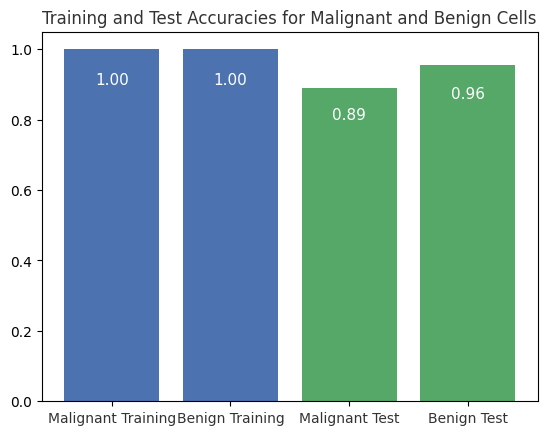

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def accuracy_plot(knn, X_train, y_train, X_test, y_test):
    # Find the training and testing accuracies by target value (i.e., malignant, benign)
    mal_train_X = X_train[y_train == 0]
    mal_train_y = y_train[y_train == 0]
    ben_train_X = X_train[y_train == 1]
    ben_train_y = y_train[y_train == 1]

    mal_test_X = X_test[y_test == 0]
    mal_test_y = y_test[y_test == 0]
    ben_test_X = X_test[y_test == 1]
    ben_test_y = y_test[y_test == 1]

    scores = [
        knn.score(mal_train_X, mal_train_y),
        knn.score(ben_train_X, ben_train_y),
        knn.score(mal_test_X, mal_test_y),
        knn.score(ben_test_X, ben_test_y)
    ]

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0', '#4c72b0', '#55a868', '#55a868'])

    # Directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.90,
            '{0:.{1}f}'.format(height, 2),
            ha='center',
            color='w',
            fontsize=11
        )

    plt.xticks([0, 1, 2, 3], ['Malignant Training', 'Benign Training', 'Malignant Test', 'Benign Test'], alpha=0.8)
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
    plt.show()


knn_classifier = knn  # Replace with your trained KNN classifier
accuracy_plot(knn_classifier, X_train, y_train, X_test, y_test)
